In [3]:
!pip install pulp
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=273702 sha256=44a9c5eb0bf5e8bf3851dce32deb847534d5eea35af347cbb5a00ce1863d00a5
  Stored in directory: /home/jovyan/.cache/pip/wheels/f3/60/5b/41a9bbd32037a7211f550249f5dc798e55c20d42c49deeaf25
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninst

In [5]:
!pip install cvxpy
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import cvxpy as cp
import scipy.linalg as la
import pulp

  Using cached cvxpy-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached scs-3.2.4.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.4 MB)
  Using cached ecos-2.0.13-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (220 kB)
  Using cached osqp-0.6.5-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)
  Using cached clarabel-0.7.1-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00a 0:00:01


In [22]:

# Download historical data for a bond
bond = yf.Ticker("^TNX") # 10-year Treasury note
bond_data = bond.history(period="1y")

# Access the bond data
print(bond_data)

                            Open   High    Low  Close  Volume  Dividends  \
Date                                                                       
2023-04-10 00:00:00-04:00  3.366  3.436  3.351  3.415       0        0.0   
2023-04-11 00:00:00-04:00  3.409  3.456  3.391  3.434       0        0.0   
2023-04-12 00:00:00-04:00  3.447  3.460  3.342  3.421       0        0.0   
2023-04-13 00:00:00-04:00  3.428  3.460  3.372  3.452       0        0.0   
2023-04-14 00:00:00-04:00  3.454  3.536  3.443  3.522       0        0.0   
...                          ...    ...    ...    ...     ...        ...   
2024-04-02 00:00:00-04:00  4.375  4.405  4.355  4.365       0        0.0   
2024-04-03 00:00:00-04:00  4.383  4.429  4.347  4.355       0        0.0   
2024-04-04 00:00:00-04:00  4.371  4.381  4.307  4.309       0        0.0   
2024-04-05 00:00:00-04:00  4.328  4.404  4.318  4.378       0        0.0   
2024-04-10 00:00:00-04:00  4.346  4.568  4.344  4.560       0        0.0   

           

test test

## how we load data from yahoo finance

In [6]:
T = 1 # Number of days in time period
R = []
assets = ["AAPL","EA","MSFT","NFLX","GOOGL","TSLA"]

for stock in assets:
    data = yf.Ticker(stock)
    # 我先改成1年， 这个之后可以随时改成想要的时段
    df = data.history(period="1y")

    # close values on that day
    close = df['Close'].values

    # convert day to day close values to return
    returns = (close[T:] - close[:-T])/close[:-T]
    R.append(returns)

R = np.array(R).T
r = np.mean(R,axis=0)
S = np.cov(R.T)

In [7]:
R

array([[-0.00759116,  0.00047758, -0.02266835, -0.00230095, -0.01024055,
         0.01235705],
       [-0.00435317,  0.00358056,  0.00233347, -0.02122939, -0.00673943,
        -0.03346004],
       [ 0.03410352,  0.01704592,  0.0223995 ,  0.04579646,  0.02666285,
         0.02968872],
       ...,
       [-0.00666355, -0.00222575, -0.00218554, -0.01221356,  0.01540988,
         0.04899941],
       [ 0.00724251,  0.00530771,  0.00398032, -0.01624729,  0.01130126,
         0.02254601],
       [-0.01149288, -0.01407909, -0.01225722, -0.00194114, -0.00536406,
        -0.03804846]])

## tesla in past 1 years

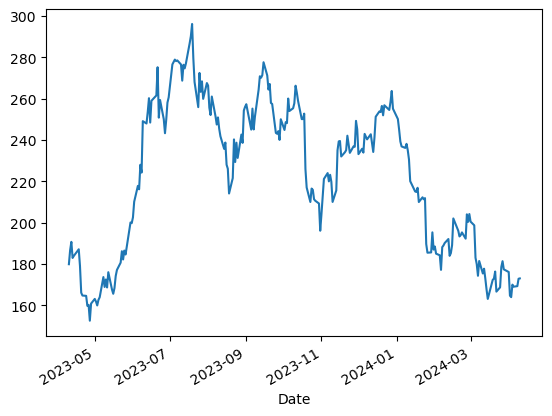

In [8]:
# last df is Tesla
df['Open'].plot()
plt.show()

## histogram of Tesla in past 1 years

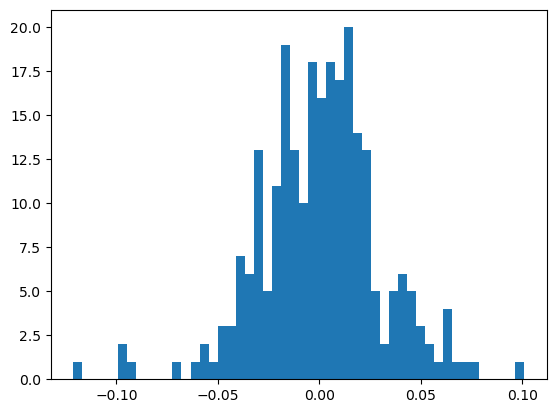

In [9]:
return_TSLA = R[:,-1]
plt.hist(return_TSLA,bins=50)
plt.show()

In [10]:
r

array([0.00023118, 0.00018604, 0.00161706, 0.00262249, 0.00165902,
       0.00013371])

In [11]:
S

array([[1.46487467e-04, 4.51157850e-05, 8.21791152e-05, 9.53603279e-05,
        9.42188118e-05, 1.32088499e-04],
       [4.51157850e-05, 1.24517103e-04, 3.93550841e-05, 4.06832438e-05,
        3.81615653e-05, 9.09659282e-05],
       [8.21791152e-05, 3.93550841e-05, 1.92515116e-04, 1.22772696e-04,
        1.00013200e-04, 1.06801511e-04],
       [9.53603279e-05, 4.06832438e-05, 1.22772696e-04, 5.01255059e-04,
        1.14221919e-04, 1.24699021e-04],
       [9.42188118e-05, 3.81615653e-05, 1.00013200e-04, 1.14221919e-04,
        2.92762801e-04, 1.35050530e-04],
       [1.32088499e-04, 9.09659282e-05, 1.06801511e-04, 1.24699021e-04,
        1.35050530e-04, 9.07600181e-04]])

# We consider risk as MAD first, all these models are model 1x




# model 1A
when we minimize MAD under a specified expected return $r_0$
$$
\begin{gathered}
\operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \\
\text { subject to } \sum_j x_j=1 \\
  \sum_j x_j r_j = r_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{gathered}
& \operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T y_t \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
&  \sum_j x_j r_j = r_0 \\
& x_j \geq 0 \quad j=1,2, \ldots, n, \\
& r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$





In [12]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
r0 = 0.0008
print(n,T,r0)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob +=  - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(r[j] * x[j] for j in range(n)) == r0

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 252 0.0008
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/30e33aa7a9b04feea3ff0842213f10b6-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/30e33aa7a9b04feea3ff0842213f10b6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 511 COLUMNS
At line 4304 RHS
At line 4811 BOUNDS
At line 4812 ENDATA
Problem MODEL has 506 rows, 258 columns and 3540 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 445 (-61) rows, 258 (0) columns and 3113 (-427) elements
Perturbing problem by 0.001% of 0.02615301 - largest nonzero change 4.9929717e-05 ( 9.933799%) - largest zero change 4.0823947e-05
0  Obj -0 Primal inf 0.7069206 (2)
35  Obj -0.00075366758 Primal inf 98.467936 (235)
85  Obj -0.0022189329 Primal inf 274.19599 (214)
135  Obj -0.0039386792 Primal inf 314.95861 (211)
182  Obj 

# model 1B
when we maximize return under a specified MAD constrait $m_0$
$$
\begin{gathered}
\operatorname{maximize} \sum_j x_j r_j  \\
\text { subject to } \sum_j x_j=1 \\
  \frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \leq m_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{gathered}
& \operatorname{maximize}  \sum_j x_j r_j   \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
& \frac{1}{T} \sum_{t=1}^T y_t \leq m_0  \\
& x_j \geq 0 \quad j=1,2, \ldots, n, \\
& r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$





In [13]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
m0 = 0.007
print(n,T,r0)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob +=  (1/T) * lpSum(y[t] for t in range(T)) <= m0, "Risk"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 252 0.0008
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/036d8cc7898545799dbbec5172562ae5-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/036d8cc7898545799dbbec5172562ae5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 511 COLUMNS
At line 4304 RHS
At line 4811 BOUNDS
At line 4812 ENDATA
Problem MODEL has 506 rows, 258 columns and 3786 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 445 (-61) rows, 258 (0) columns and 3359 (-427) elements
Perturbing problem by 0.001% of 0.026105018 - largest nonzero change 0.00011218616 ( 35.760766%) - largest zero change 9.9568997e-05
0  Obj -0 Primal inf 13.205664 (2) Dual inf 0.057853972 (6)
50  Obj 0.0066513111 Primal inf 4247.4387 (236)
81  Obj 0.0032928301 Primal inf 51.179417 (177)
121  Obj 0.002055181 Primal inf 244

## model 1C
when combine return and risk together with $\mu$

$$
\begin{gathered}
\operatorname{maximize} \mu \sum_j x_j r_j-\frac{1}{T} \sum_{t=1}^T\left|\sum_j x_j\left(R_j(t)-r_j\right)\right| \\
\text { subject to } \sum_j x_j=1 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

The LP version is
$$
\begin{aligned}
& \operatorname{maximize} \mu \sum_j x_j r_j-\frac{1}{T} \sum_{t=1}^T y_t \\
& \text { subject to }-y_t \leq \sum_j x_j\left(R_j(t)-r_j\right) \leq y_t \quad t=1,2, \ldots, T \text {, } \\
& \sum_j x_j=1 \\
& x_j \geq 0 \quad j=1,2, \ldots, n \\
& y_t \geq 0 \quad t=1,2, \ldots, T . \\
&
\end{aligned}
$$

below is pulp implementation

In [14]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods
mu = 1
print(n,T,mu)


# Create a LP problem
prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

# Define decision variables
x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

# Define objective function
prob += lpSum(r[j] * x[j] for j in range(n)) * mu - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

# Define constraints
for t in range(T):
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
    prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

prob += lpSum(x) == 1, "Sum_of_weights"

# Solve the problem
prob.solve()

# Print the results
print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


6 252 1
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/75a47ce1b67d409c9cea06237d32cf43-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/75a47ce1b67d409c9cea06237d32cf43-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 510 COLUMNS
At line 4303 RHS
At line 4809 BOUNDS
At line 4810 ENDATA
Problem MODEL has 505 rows, 258 columns and 3534 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 444 (-61) rows, 258 (0) columns and 3107 (-427) elements
Perturbing problem by 0.001% of 0.02615301 - largest nonzero change 8.1804922e-05 ( 35.760766%) - largest zero change 0
0  Obj -0 Primal inf 0.25985563 (1) Dual inf 0.05779028 (6)
46  Obj -0.00029031063 Primal inf 52.01481 (226)
90  Obj -0.0017258286 Primal inf 180.29466 (205)
136  Obj -0.0033554668 Primal inf 482.74958 (228)
1

# Efficient frontier

Let us use model 1B to compute the efficient frontier

In [20]:
from pulp import *

# Define the data
n = len(assets)  # Number of assets
T = len(R[:,0])  # Number of time periods

m0_array = np.linspace(0.0,0.01,50)
risk_array = 0. * m0_array
i = 0
for i in range(len(m0_array)):

  # Define the data
  n = len(assets)  # Number of assets
  T = len(R[:,0])  # Number of time periods
  r0 = m0_array[i]

  # Create a LP problem
  prob = LpProblem("Financial_Portfolio_Optimization", LpMaximize)

  # Define decision variables
  x = [LpVariable(f"x{j}", lowBound=0) for j in range(n)]
  y = [LpVariable(f"y{t}", lowBound=0) for t in range(T)]

  # Define objective function
  prob +=  - (1/T) * lpSum(y[t] for t in range(T)), "Objective"

  # Define constraints
  for t in range(T):
      prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) <= y[t], f"Upper_constraint_{t}"
      prob += lpSum(x[j] * (R[t][j] - r[j]) for j in range(n)) >= -y[t], f"Lower_constraint_{t}"

  prob += lpSum(r[j] * x[j] for j in range(n)) == r0

  prob += lpSum(x) == 1, "Sum_of_weights"

  # Solve the problem
  prob.solve()
  risk_array[i] = value( (1/T) * lpSum(y[t] for t in range(T)))

print("Status:", LpStatus[prob.status])
print("Optimal Portfolio Weights:")
for j in range(n):
    print(f"x{j}: {value(x[j])}")
print("expected return (MAD):", value(lpSum(r[j] * x[j] for j in range(n))))
print("Mean Absolute Deviation (MAD):", value( (1/T) * lpSum(y[t] for t in range(T))))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/474bd9efcf6a4a0182c9812787e8386a-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/474bd9efcf6a4a0182c9812787e8386a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 511 COLUMNS
At line 4304 RHS
At line 4811 BOUNDS
At line 4812 ENDATA
Problem MODEL has 506 rows, 258 columns and 3540 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
Perturbing problem by 0.001% of 0.02615301 - largest nonzero change 5.0600604e-06 ( 0.99595923%) - largest zero change 4.2498489e-06
0  Obj -0 Primal inf 0.25985653 (1)
36  Obj -0.0010304185 Primal inf 337.26582 (253)
89  Obj -0.0033157766 Primal inf 220.01279 (222)
142  Obj -0

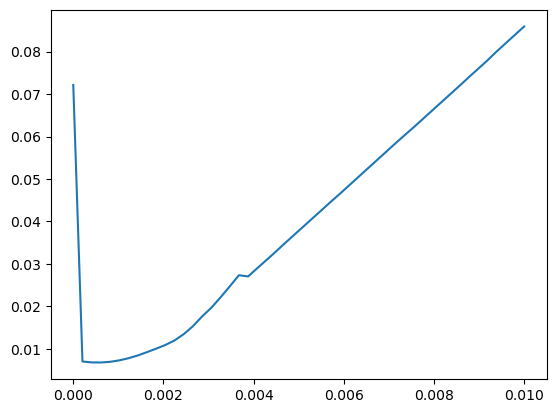

In [16]:
plt.figure()
plt.plot(m0_array, risk_array)

# Now we consider risk as total variance of the portfolio, all these models are model 2x


# model 2A
when we minimize variance under a specified expected return $r_0$
$$
\begin{gathered}
\operatorname{maximize} -\frac{1}{T} \sum_{t=1}^T\left(\sum_j x_j\left(R_j(t)-r_j\right)\right)^2 \\
\text { subject to } \sum_j x_j=1 \\
  \sum_j x_j r_j = r_0 \\
x_j \geq 0 \quad j=1,2, \ldots, n, \\
r_j=\frac{1}{T} \sum_{t=1}^T R_j(t)
\end{gathered}
$$

In [17]:
# centered return
R_c = 0. * R
for j in range(len(R[0,:])):
  R_c[:,j] = R[:,j] - r[j]

#print(np.outer(R_c[0,:],R_c[0,:]))
R_c.T @ R_c

# compute the convariance matrix manually
sig = 0. * S
for i in range(len(R[:,0])):
  sig = sig + np.outer(R_c[i,:],R_c[i,:])
sig = sig / T


r0 = 0.0005
n = len(R[0,:])
e = np.ones((n,1))
rq = r.reshape(n,1)

X = cp.Variable((n,1))
Objective = cp.Minimize(cp.quad_form(X,sig))
constraints = [e.T@X == 1, X >= 0, rq.T@X >= r0]
problem = cp.Problem(Objective,constraints)

result = problem.solve()

print("expected portfolio", X.value.T)
print("expected return :", (rq.T @ X.value)[0] )
print("Mean variance:", (X.value.T @ sig @ X.value)[0] )


expected portfolio [[ 2.60344055e-01  4.84234225e-01  1.68995439e-01  1.77980301e-02
   6.86282512e-02 -3.52606157e-19]]
expected return : [0.00058408]
Mean variance: [8.17094068e-05]


## Optimization Problem

Choose a risk tolerance $q > 0$:

\begin{align*}
\text{minimize:} \ \ & \mathbf{x}^T \Sigma \mathbf{x} - q \mathbf{r}^T \mathbf{x} \\
\text{subject to:} \ \ & \mathbf{e}^T \mathbf{x} = 1 \\
& \mathbf{x} \geq 0 \\
\end{align*}

In [18]:
n = len(assets)
q = 0.1
e = np.ones(n)
X = cp.Variable(n)

obj = cp.Minimize(cp.quad_form(X,S) - q*r@X)
constraints = [e@X == 1, X >= 0]
problem = cp.Problem(obj,constraints)

result = problem.solve()
X.value

array([-8.92537482e-23,  2.03972387e-01,  3.91119814e-01,  1.96348712e-01,
        2.08559087e-01,  7.67512689e-24])

## Optimization Problem

\begin{align*}
\text{minimize:} \ \ & \mathbf{x}^T \Sigma \mathbf{x} \\
\text{subject to:} \ \ & \mathbf{e}^T \mathbf{x} = 1 \\
& \mathbf{r}^T \mathbf{x} = \mu \\
& \mathbf{x} \geq 0 \\
\end{align*}

case mu = 0.01,   minimize risk sigma = 0.001

case mu = 0.02,  minimize risk sigma = 0.003

case mu = 0.05,  minimize risk  sigma = 0.010



In [19]:
n = len(assets)
e = np.ones((n,1))
r = r.reshape(n,1)
mu = 0.001

M = np.block([[2*S,-r,-e],[r.T,0,0],[e.T,0,0]])
b = np.block([[np.zeros((n,1))],[mu],[1]])

x = la.solve(M,b)